<a href="https://colab.research.google.com/github/robot-or-brain/robot_or_brain/blob/main/robotorbrain_clip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y clip

Found existing installation: clip 1.0
Uninstalling clip-1.0:
  Successfully uninstalled clip-1.0


In [2]:
pip install git+https://github.com/openai/CLIP.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-dvy4u4mh
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-dvy4u4mh
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369387 sha256=208cf3f088f4642807027ddb9fe24a15cb7092aa3e20f84f7afe1aa2b90c1f7a
  Stored in directory: /tmp/pip-ephem-wheel-cache-ggabg2ne/wheels/fd/b9/c3/5b4470e35ed76e174bff77c92f91da82098d5e35fd5bc8cdac
Successfully built clip


In [3]:
import torch
import clip
from PIL import Image

In [4]:
import os
from urllib.parse import urlparse
def download(url):
    filename = os.path.basename(urlparse(url).path)
    os.system(f"wget {url}")
    return filename

In [56]:
robot_image_path = download('https://www.evolving-science.com/sites/default/files/field/image/Artificial-Intelligence.jpg')
helping_image_path = download("https://www.ingenious.news/wp-content/uploads/2019/08/ai.png")
scanning_image_path = download('https://b360nepal.com/wp-content/uploads/2021/01/techmind.jpg')
traffic_image_path = download('http://pythonawesome.com/content/images/2020/03/Object-Detection-and-Tracking.png')

In [22]:
_collab = ("Collaborative/ Interactive AI // Human-computer interaction", """Collaborative/ Interactive AI // Human-computer interaction
= AI depicted as interacting with humans, in the form of robots, human-computer interfaces, AI as a recognition device, or entering a relationship with humans, AI performs a task that aids or supports humans. AI and humans are depicted at one level, not one dominating the other (as opposed to the superior human frame).
 Included concepts:
−	Welfare
−	Job producer
−	Progress
−	Moral agent
Examples from coding:""")
collab = "AI interacting with humans, AI performs a task that supports humans."
len(collab)

68

In [35]:
_thinking = """Thinking machine = AI embodied as the “thinking machine” visualized as a brain, face, eye, android or the like that shows to process or store large amounts of data like a machine (depicted, amongst others, with gears, wheels, wires, data points, etc.). “Thinking” refers to processes going on in a brain/head that are visualized, e.g., as wires, data points. Do not code if appeals to “magic AI.” """
thinking = "AI visualized as a brain, face, eye, android storing large amounts of data"
len(thinking)

74

In [38]:
_acting = """Acting/Performing machine
= can be impersonated or in the form of a machine/robot/product, visualizes AI as performing an act or task, just as (or even more) capable than humans, in a non-threatening (as in menacing machine) manner. In this frame, no people are present.
Included concepts:
−	Trust
−	Likeable AI
−	Friendly AI
−	AI as game"""
acting = "Machine,robot or product, performing an act or task"

In [40]:
_learning = """Learning/recognition machine // AI as software // Machine learning
= visualization of AI as scanning or recognizing data points in an image, for instance, traffic, shops, or faces. If a human is the subject of scanning, this frame applies, too. However, if the scanning/recognition is part of an interaction between humans, this is coded as collaborative AI
Included concepts:
−	Progress
−	4th industrial revolution"""
learning = "AI scanning or recognizing data points in traffic, shops, or faces"
len(learning)

66

In [41]:
_mysterious = """Mysterious AI
= depicts AI as working “magically” or in a mysterious way. This can be visualized as a shining light or as a scene where the consequence of the activity is unknown. It can also be visualized as creating something new, as being god-like, or to establish connections between the human and computer that are depicted as “magic” (as opposed to working together like in collaborative AI).
Included concepts:
−	Magic powers
−	“blessed by the algorithm”
−	Deification
−	Dominance
−	“good” AI
−	Creation
−	Immortality
−	Quasi-religious
−	Metaphysical machine"""
mysterious = "AI working “magically” or in a mysterious way."
len(mysterious)

49

In [44]:
_complx = """Complex AI
= AI visualized as complex data, complex interactions/nodes/networks, also in cities, the earth, or a complex technology that works dynamically. Only code if complexity is a salient part of the image.
Included concepts:
−	Complexity
−	Nonlinearity"""
complx = "AI visualized as complex data, complex interactions/nodes/networks"

In [45]:
_superior = """Superior human
= AI depicted as technology that is created and/or controlled by humans. Do not code magic AI if the feature that humans control AI is salient.
−	Gratification
−	Ease
−	AI for humanity
−	Dominance (of humans, not AI)"""
superior = "AI depicted as technology that is created and/or controlled by humans."

0.77 AI scanning or recognizing data points in traffic, shops, or faces
0.10 AI interacting with humans, AI performs a task that supports humans.
0.06 AI visualized as a brain, face, eye, android storing large amounts of data
0.05 AI depicted as technology that is created and/or controlled by humans.
0.01 AI as working “magically” or in a mysterious way.
0.01 AI visualized as complex data, complex interactions/nodes/networks
0.00 Machine,robot or product, performing an act or task
0.00 Complex AI
0.00 a helpful artificial intelligence
0.00 Thinking machine
0.00 a floating brain
0.00 Acting/performing machine
0.00 a dog
0.00 a monster
0.00 a cat


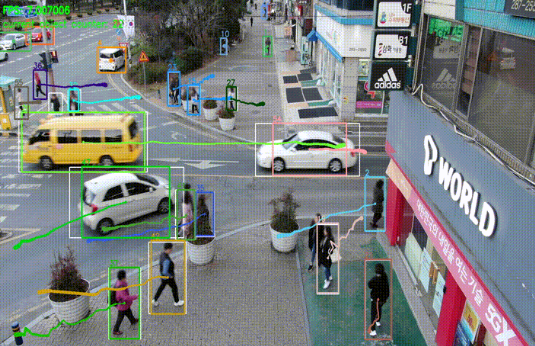

In [57]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

img = Image.open(traffic_image_path)
image = preprocess(img).unsqueeze(0).to(device)
labels = ["a helpful artificial intelligence", "Thinking machine", "Acting/performing machine", "a dog", "a cat","a monster","a floating brain", "Complex AI", collab, thinking, acting, learning, mysterious, complx, superior]
text = clip.tokenize(labels).to(device)

with torch.no_grad():
    # image_features = model.encode_image(image)
    # text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()


for prob, label in sorted(zip(probs[0], labels), key=lambda x : x[0], reverse=True):
    print(f'{prob:.2f} {label}')
img

In [37]:
for prob, label in sorted(zip(probs[0], labels), key=lambda x : x[0], reverse=True):
    print(f'{prob:.2f} {label}')

0.81 AI interacting with humans, AI performs a task that supports humans.
0.07 Complex AI
0.05 a helpful artificial intelligence
0.05 AI visualized as a brain, face, eye, android storing large amounts of data
0.02 Thinking machine
0.00 Acting/performing machine
0.00 a floating brain
0.00 a monster
0.00 a cat
0.00 a dog


In [29]:
sorted?

In [16]:
image

tensor([[[[-0.1134, -0.1280, -0.1426,  ...,  1.2150,  1.1858,  1.1712],
          [ 0.0033,  0.0033,  0.0179,  ...,  1.2150,  1.1858,  1.1712],
          [ 0.0179,  0.0325,  0.0471,  ...,  1.2004,  1.1712,  1.1712],
          ...,
          [ 0.3391,  0.3391,  0.3391,  ...,  0.7479,  0.6311,  0.4267],
          [ 0.3245,  0.3391,  0.3391,  ...,  0.7917,  0.8063,  0.8063],
          [ 0.3099,  0.3245,  0.3537,  ...,  0.7625,  0.7625,  0.7917]],

         [[ 0.4540,  0.4390,  0.4240,  ...,  1.9398,  1.9098,  1.8798],
          [ 0.5741,  0.5741,  0.5891,  ...,  1.9398,  1.9098,  1.8798],
          [ 0.5891,  0.6041,  0.6191,  ...,  1.9248,  1.8948,  1.8798],
          ...,
          [ 0.4390,  0.4390,  0.4390,  ...,  1.0844,  0.9643,  0.7542],
          [ 0.4240,  0.4390,  0.4390,  ...,  1.1294,  1.1444,  1.1444],
          [ 0.4090,  0.4240,  0.4540,  ...,  1.0994,  1.0994,  1.0994]],

         [[ 0.8234,  0.8092,  0.7950,  ...,  2.1459,  2.1459,  2.1459],
          [ 0.9372,  0.9372,  